In [102]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [103]:
data=pd.read_csv(r"C:\CODING\SHIASH\projects\employee salary prediction\Salary Data.csv")

In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [105]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [106]:
data.isna().sum().sum()

12

In [107]:
data.dropna(inplace=True)

In [108]:
for i in data.select_dtypes(include=["int64","float64"]).columns:
    if data[i].skew()>0.5:
        data[i]=data[i].fillna(data[i].median())
    else:
        data[i]=data[i].fillna(data[i].mean())

In [109]:
data.duplicated().sum()

49

In [110]:
data.drop_duplicates(keep="first",inplace=True)

In [111]:
data.duplicated().sum()

0

In [112]:
le=LabelEncoder()
for i in data:
    if data[i].dtypes=="object":
        data[i]=le.fit_transform(data[i])


In [113]:
data.isna().sum().sum()

0

In [114]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,159,5.0,90000.0
1,28.0,0,1,17,3.0,65000.0
2,45.0,1,2,130,15.0,150000.0
3,36.0,0,0,101,7.0,60000.0
4,52.0,1,1,22,20.0,200000.0


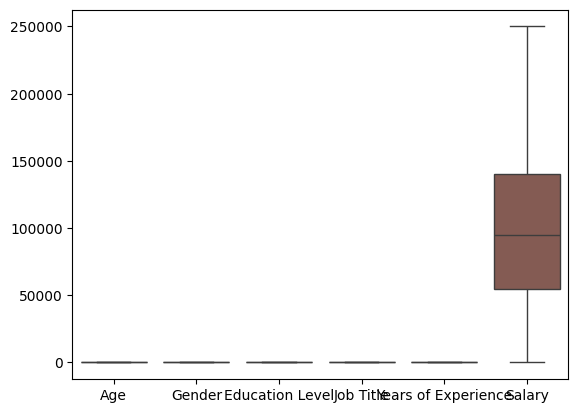

In [115]:
sns.boxplot(data)
plt.xticks="vertical"

In [116]:
x=data.drop(["Salary"],axis=1)
y=data["Salary"]

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [118]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(243, 5)
(81, 5)
(243,)
(81,)


In [119]:
sal_model=LinearRegression()
sal_model.fit(x_train,y_train)

LinearRegression()

In [120]:
pred=sal_model.predict(x_test)
pred

array([ 64172.49916852, 105158.04959166, 134260.12552182,  64109.49238181,
        47255.8741098 ,  41975.65164064,  98579.53303674,  84926.8486715 ,
       185771.378451  ,  47095.49319817, 124954.52812297, 150116.49375734,
        38617.13305485,  50040.55246164, 189191.85255968,  38783.24185619,
       104959.99459066,  90103.96912604, 137655.43258436, 125321.05658069,
       127439.98633562, 149461.25072641, 175061.01359979,  45545.11142355,
       122747.25888397, 173279.09915741,  41567.92020803, 155971.92633518,
        61280.36078708, 121713.81759919, 168618.91513388,  89879.21155297,
        52541.82446866, 168946.77472157, 165171.17145142,  40086.27310983,
        90557.52367627,  78638.0333528 ,  61802.96862462, 112356.77024343,
        69901.91817293, 109003.97954734,  44806.15311009, 181227.12209622,
       162702.89690787,  69924.82973173, 116107.10541706,  60859.80370034,
       169533.44060965, 122128.64679623,  87296.3792154 ,  44230.94300141,
        95358.48380378,  

In [121]:
accuracy=r2_score(y_test,pred)
accuracy*100

88.61718772486752

In [122]:
de_sal_model=DecisionTreeClassifier()
de_sal_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [123]:
pred1=de_sal_model.predict(x_test)

In [124]:
acc=r2_score(y_test,pred1)
acc*100

81.66615078332195

Linear Prediction

In [125]:
sal_model.predict([[47.0,	1	,1,	30,	20.0]])

C:\Users\sundh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([169211.30891165])

Decision Tree Prediction

In [126]:
de_sal_model.predict([[31.0,	1,	0	,59	,3.0]])

C:\Users\sundh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([50000.])

In [127]:
x_train

,Age,Gender,Education Level,Job Title,Years of Experience
249,47.0,1,1,30,20.0
247,31.0,1,0,59,3.0
320,45.0,0,1,134,16.0
160,39.0,0,0,149,12.0
259,29.0,1,0,51,1.5
...,...,...,...,...,...
264,42.0,1,0,138,12.0
193,34.0,1,0,141,7.0
117,48.0,1,2,90,20.0
47,45.0,0,1,29,16.0


In [128]:
y_train

249    170000.0
247     50000.0
320    160000.0
160     90000.0
259       350.0
         ...   
264    110000.0
193     95000.0
117    170000.0
47     180000.0
173    140000.0
Name: Salary, Length: 243, dtype: float64